In [1]:
import pandas as pd

# Masukkan file csvnya
file_path = '/kaggle/input/sales-forecasting/train.csv'
data = pd.read_csv(file_path)

# Perlihatkan initial data info
print("Initial Data Info:")
print(data.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   fl

In [2]:
#Melakukan Data Cleaning
file_path = '/kaggle/input/sales-forecasting/train.csv'
data = pd.read_csv(file_path)

#Mengganti Value yang hilang di dalam Postal Code
data['Postal Code'] = data['Postal Code'].fillna(0).astype(int)

#Mengubah 'Order Date' dan 'Ship Date' menjadi format date time
data['Order Date'] = pd.to_datetime(data['Order Date'], errors='coerce')
data['Ship Date'] = pd.to_datetime(data['Ship Date'], errors='coerce')

#Menghapus row yang sama atau duplicate
initial_row_count = data.shape[0]
data = data.drop_duplicates()
duplicate_row_count = initial_row_count - data.shape[0]
print(f"Menghapus {duplicate_row_count} row yang sama.")

#Cek data yang telah di perbaharui
print("Info data yang telah diperbaharui:")
print(data.info())

Menghapus 0 row yang sama.
Info data yang telah diperbaharui:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     3959 non-null   datetime64[ns]
 3   Ship Date      3815 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   int64         
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category  

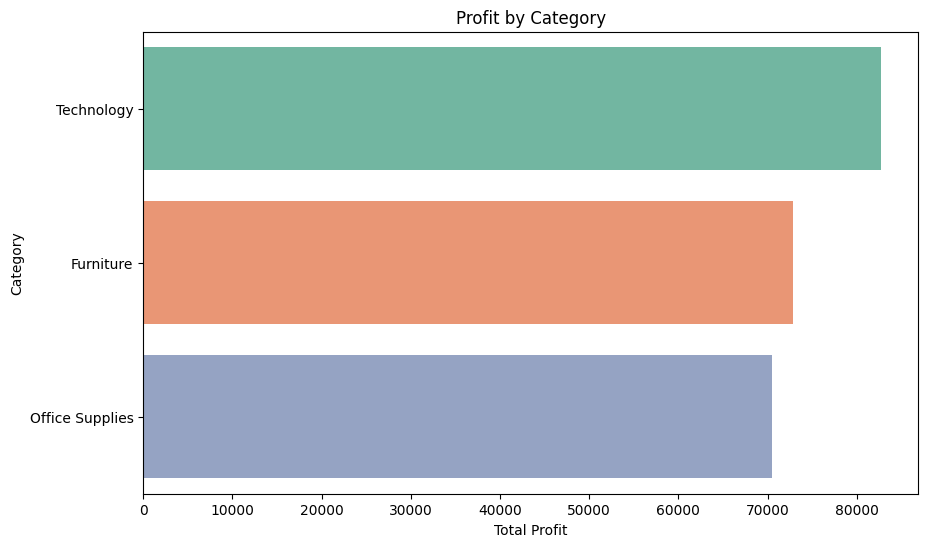

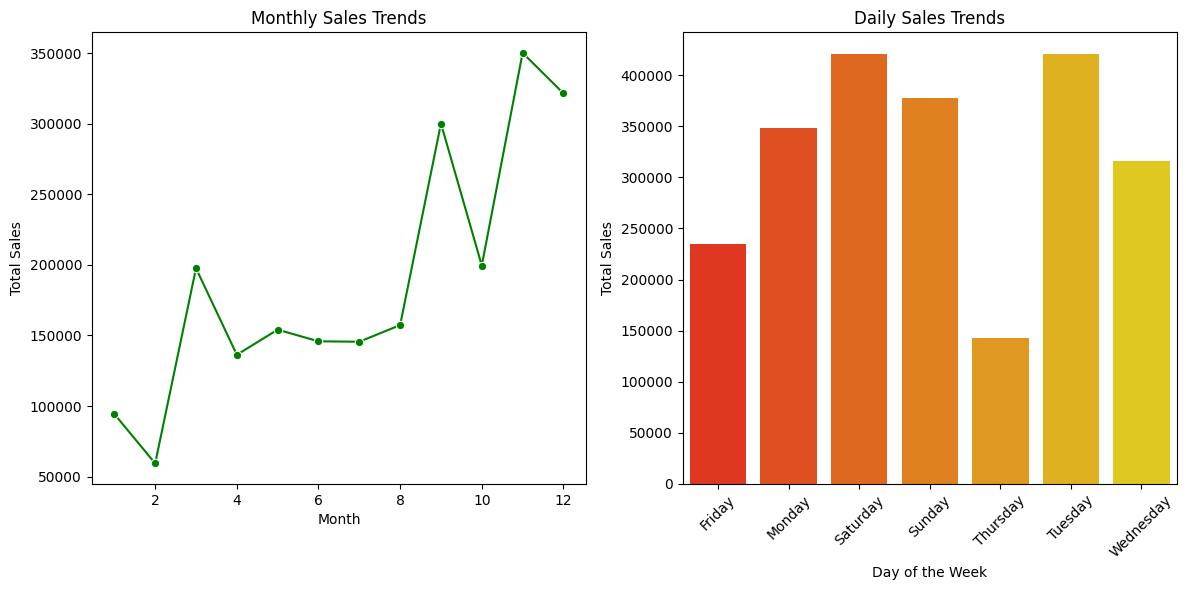

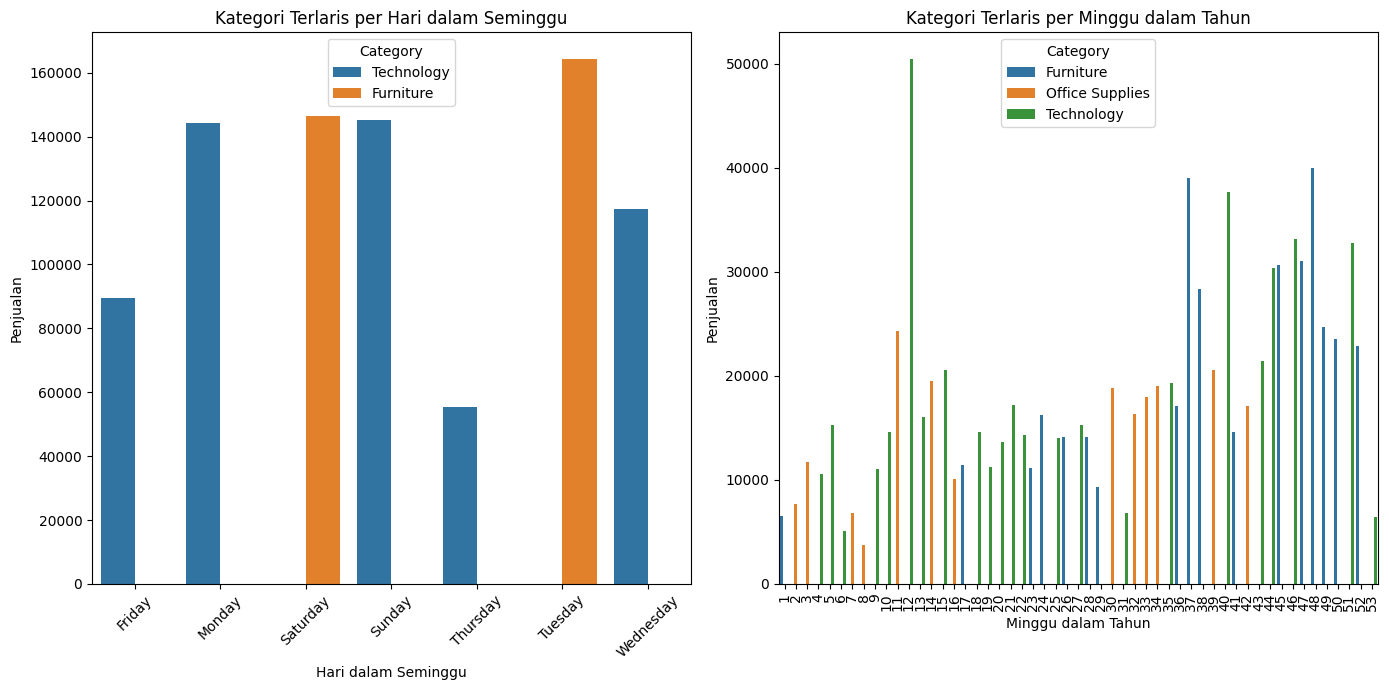

In [3]:
#Melakukan 5 Visualisasi Data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

file_path = '/kaggle/input/sales-forecasting/train.csv'
data = pd.read_csv(file_path)



warnings.simplefilter(action='ignore', category=FutureWarning)
data['Order Date'] = pd.to_datetime(data['Order Date'], format="%d/%m/%Y")
data['Ship Date'] = pd.to_datetime(data['Ship Date'], format="%d/%m/%Y")
data['Postal Code'] = data['Postal Code'].fillna(0).astype(int)
data['Day of Week'] = data['Order Date'].dt.day_name()
data['Week of Year'] = data['Order Date'].dt.isocalendar().week
data.drop_duplicates(inplace=True)
data.dropna(inplace=True)
data.replace([np.inf, -np.inf], np.nan, inplace=True)

#Visualisasi 1 Analisis Keuntungan(dengan asumsi keuntungan simpel)
#Kita asumsikan keuntungan sebesar 10%

data['Profit'] = data['Sales'] * 0.10
profit_by_category = data.groupby('Category')['Profit'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_by_category.values, y=profit_by_category.index, palette='Set2')
plt.title('Profit by Category')
plt.xlabel('Total Profit')
plt.ylabel('Category')
plt.show()

#Visualisasi 2 Tren penjualan berdasarkan hari dan bulan
data['Month'] = data['Order Date'].dt.month
data['Day'] = data['Order Date'].dt.day_name()
monthly_sales = data.groupby('Month')['Sales'].sum()
daily_sales = data.groupby('Day')['Sales'].sum()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='g')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')

plt.subplot(1, 2, 2)
sns.barplot(x=daily_sales.index, y=daily_sales.values, palette='autumn')
plt.title('Daily Sales Trends')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Visualisasi 3 Barang apa yang paling laku setiap harinya

# Mengelompokkan data berdasarkan 'Day of Week' dan 'Category' untuk menemukan kategori dengan penjualan tertinggi setiap hari
daily_sales = data.groupby(['Day of Week', 'Category'])['Sales'].sum().reset_index()
# Langkah ini memilih kategori teratas per hari berdasarkan penjualan
top_daily_sales = daily_sales.loc[daily_sales.groupby('Day of Week')['Sales'].idxmax()]

# Mengelompokkan data berdasarkan 'Week of Year' dan 'Category' untuk menemukan kategori dengan penjualan tertinggi setiap minggu
weekly_sales = data.groupby(['Week of Year', 'Category'])['Sales'].sum().reset_index()
# Langkah ini memilih kategori teratas per minggu berdasarkan penjualan
top_weekly_sales = weekly_sales.loc[weekly_sales.groupby('Week of Year')['Sales'].idxmax()]

# Memvisualisasikan hasil
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.barplot(x='Day of Week', y='Sales', hue='Category', data=top_daily_sales)
plt.title('Kategori Terlaris per Hari dalam Seminggu')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Penjualan')
plt.xticks(rotation=45)  # Memutar label untuk visibilitas yang lebih baik

plt.subplot(1, 2, 2)
sns.barplot(x='Week of Year', y='Sales', hue='Category', data=top_weekly_sales)
plt.title('Kategori Terlaris per Minggu dalam Tahun')
plt.xlabel('Minggu dalam Tahun')
plt.ylabel('Penjualan')
plt.xticks(rotation=90)  # Memutar label untuk visibilitas yang lebih baik

plt.tight_layout()
plt.show()
